# IRIS - Connection II

![Add layer](https://github.com/DrKAI/image/blob/main/Add%20Layer.png?raw=true)

In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras

from sklearn.datasets import load_iris

## 데이터 불러오기
* iris.feature_names를 이용하여 판다스 데이터 프레임 만들기!

In [8]:
iris = load_iris()

x = iris.data
y = iris.target

In [15]:
df_x = pd.DataFrame(x, columns=iris.feature_names)
df_x.head(1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2


## train set, test set 구분하기

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
train_x, test_x, train_y, test_y =\
    train_test_split(df_x, y, test_size=0.1, random_state=2022)

train_x.shape, train_y.shape

((135, 4), (135,))

## **sepal끼리, petal끼리**

In [18]:
train_x.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [21]:
tr_x_se = train_x.loc[: , ['sepal length (cm)', 'sepal width (cm)']]
tr_x_pe = train_x.loc[: , ['petal length (cm)', 'petal width (cm)']]

In [22]:
tr_x_se.shape, tr_x_pe.shape

((135, 2), (135, 2))

In [23]:
te_x_se = test_x.loc[: , ['sepal length (cm)', 'sepal width (cm)']]
te_x_pe = test_x.loc[: , ['petal length (cm)', 'petal width (cm)']]

## One-hot Encoding

In [24]:
train_y.shape

(135,)

In [25]:
from tensorflow.keras.utils import to_categorical

In [26]:
train_y = to_categorical(train_y, 3)
test_y = to_categorical(test_y, 3)

In [27]:
tr_x_se.shape, tr_x_pe.shape, train_y.shape

((135, 2), (135, 2), (135, 3))

## Modeling : multi-input & Add layer

- Functional API

In [28]:
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Add

In [31]:
## 세션 클리어
clear_session()

## 레이어 엮기
il_se = Input(shape=(2,))
hl_se = Dense(4, activation='swish')(il_se)

il_pe = Input(shape=(2,))
hl_pe = Dense(4, activation='swish')(il_pe)

add_l = Add()([hl_se, hl_pe])
ol = Dense(3, activation='softmax')(add_l)

## 모델 시작 끝 지정
model = Model([il_se, il_pe], ol)

## 컴파일
model.compile(loss='categorical_crossentropy', metrics=['accuracy'],
              optimizer='adam')

## 요약
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 4)            12          ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 4)            12          ['input_2[0][0]']                
                                                                                              

## 모델 시각화

In [32]:
from tensorflow.keras.utils import plot_model

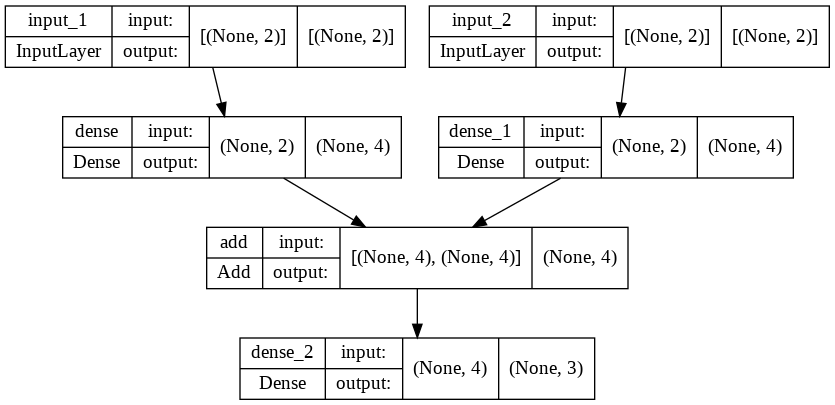

In [33]:
plot_model(model, show_shapes=True)

## 학습 시켜보기!

In [34]:
from tensorflow.keras.callbacks import EarlyStopping

In [35]:
es = EarlyStopping(monitor='val_loss', # 관측 대상
                   min_delta=0,        # 주어진 값 이상으로 안 변하면 개선된게 아니야!
                   verbose=1,          # 어디서 멈췄는지 알려줘
                   patience=1,         # 개선되지 않는걸 몇번이나 참을래?
                   restore_best_weights=True) # 학습 최적 가중치를 모델에 전달

In [36]:
model.fit([tr_x_se, tr_x_pe], train_y, validation_split=0.1, callbacks=[es],
          epochs=10000, verbose=1)

Epoch 1/10000
4/4 [==============================] - 1s 73ms/step - loss: 3.0805 - accuracy: 0.3223 - val_loss: 2.6144 - val_accuracy: 0.5000
Epoch 2/10000
4/4 [==============================] - 0s 9ms/step - loss: 2.9697 - accuracy: 0.3223 - val_loss: 2.5378 - val_accuracy: 0.5000
Epoch 3/10000
4/4 [==============================] - 0s 9ms/step - loss: 2.8617 - accuracy: 0.3223 - val_loss: 2.4646 - val_accuracy: 0.5000
Epoch 4/10000
4/4 [==============================] - 0s 9ms/step - loss: 2.7588 - accuracy: 0.3223 - val_loss: 2.3952 - val_accuracy: 0.5000
Epoch 5/10000
4/4 [==============================] - 0s 9ms/step - loss: 2.6654 - accuracy: 0.3223 - val_loss: 2.3288 - val_accuracy: 0.5000
Epoch 6/10000
4/4 [==============================] - 0s 9ms/step - loss: 2.5679 - accuracy: 0.3223 - val_loss: 2.2654 - val_accuracy: 0.5000
Epoch 7/10000
4/4 [==============================] - 0s 11ms/step - loss: 2.4888 - accuracy: 0.3223 - val_loss: 2.2015 - val_accuracy: 0.5000
Epoch 8/100